### KELOMPOK  : 4
### KELAS     : TI-5B

### Regresi logistik untuk prediksi penyakit jantung menggunakan metode penelitian framingham heart study

Source Dataset : https://www.kaggle.com/code/dileep070/logistic-regression/input?select=framingham.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Ket :
- numpy      => digunakan untuk memproses data array
- pandas     => digunakan untuk mengolah dataset
- matplotlib => digunakan untuk membuat visualisasi data yang akan diolah.

### Cek dataset

In [ ]:
data = pd.read_csv("/content/framingham.csv")
data.shape

(4238, 16)

In [ ]:
# Menampilkan 5 baris pertama data Menggunakan perintah .head()
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Menampilkan 5 baris terakhir data Menggunakan perintah .tail()
data.tail(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [ ]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
data.rename(columns={"TenYearCHD": "CHD"}, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.14, random_state=0)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('./heart_study_train.csv')
test_data.to_csv('./heart_study_test.csv')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='CHD', ylabel='age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


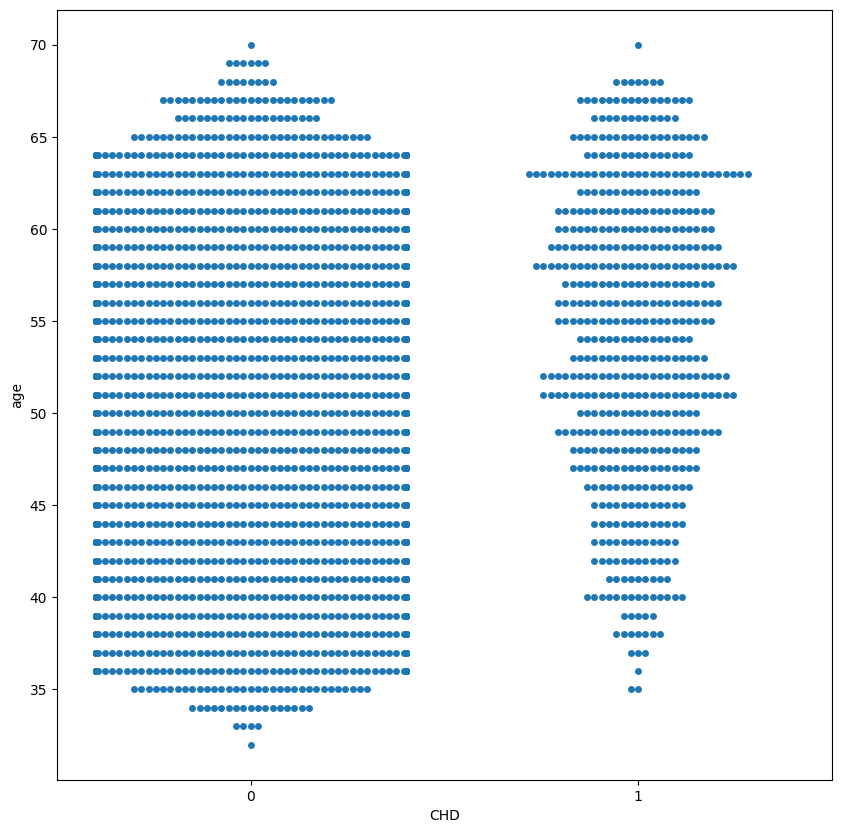

In [ ]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='CHD', y='age', data=train_data)

<Figure size 2000x1500 with 0 Axes>

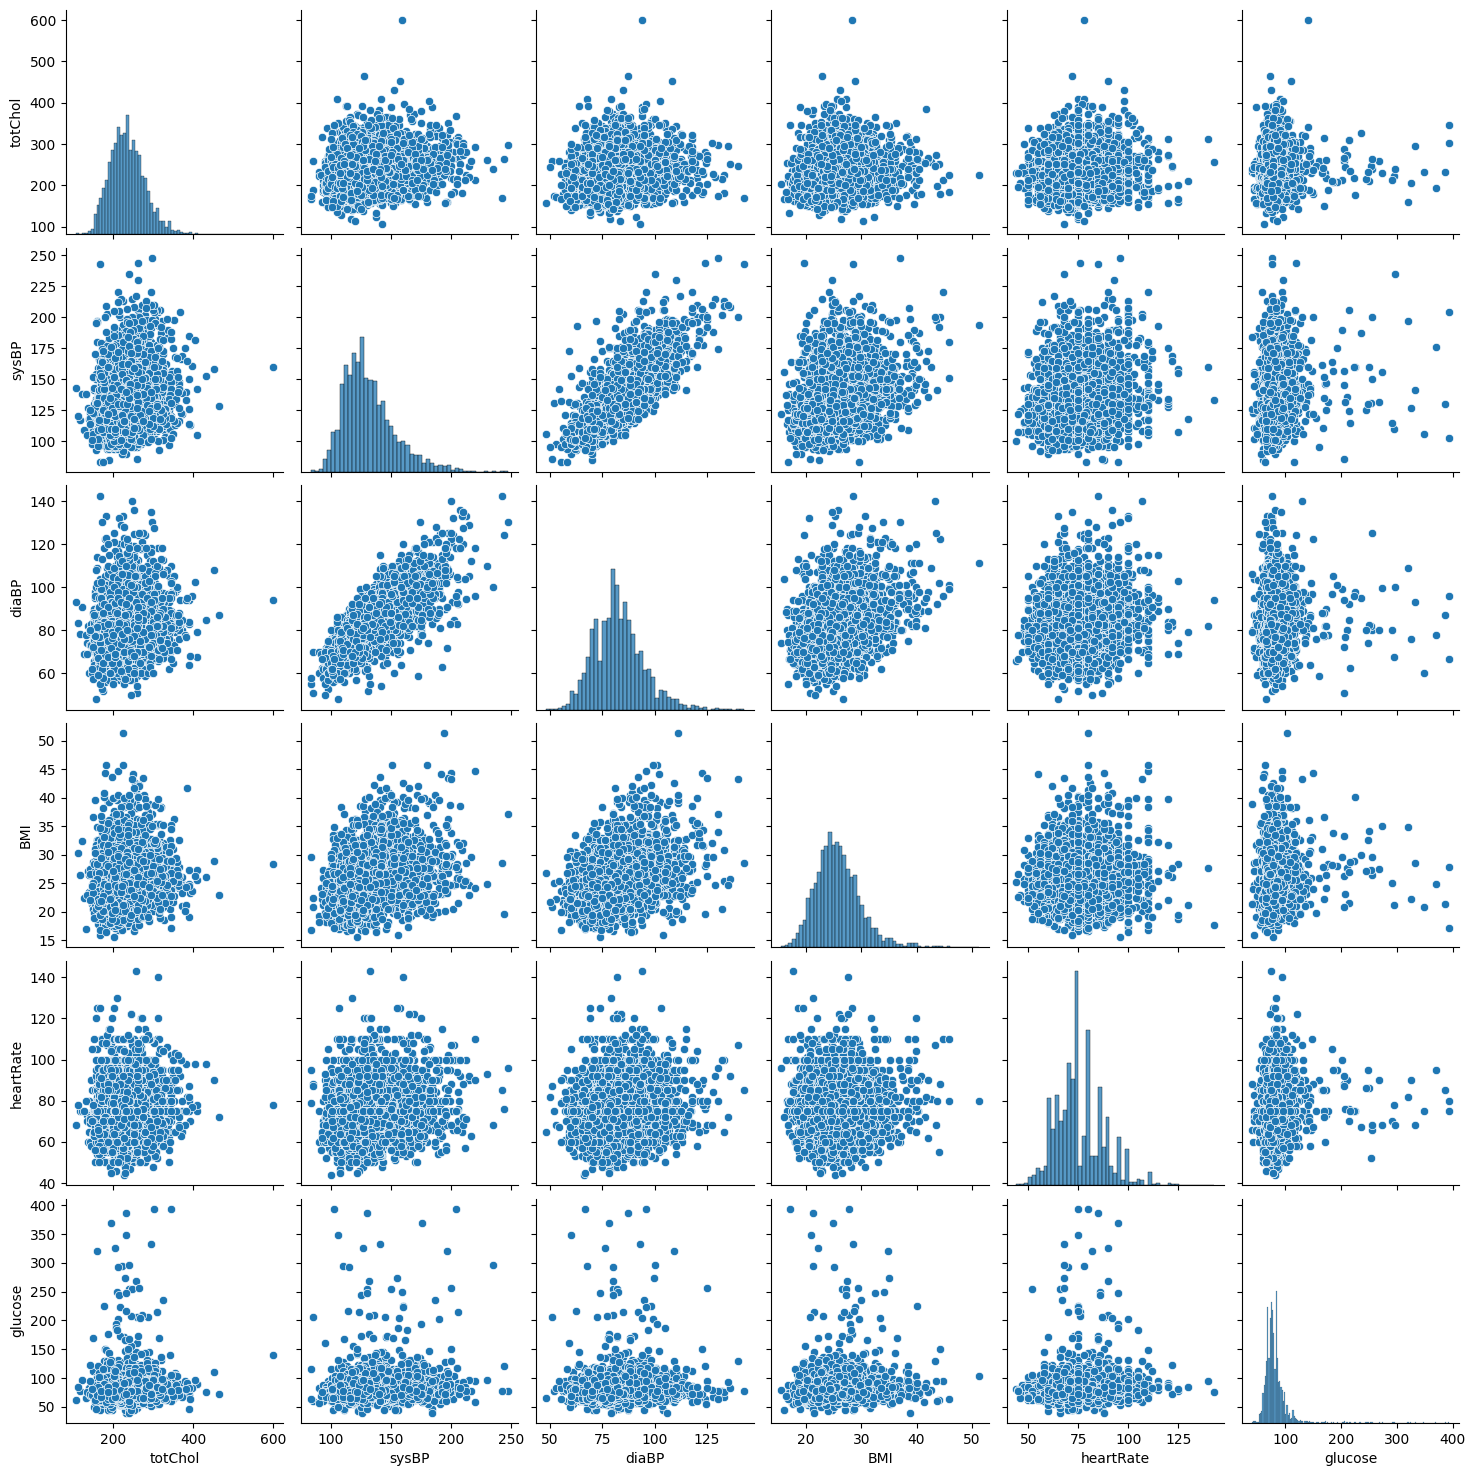

In [ ]:
plt.figure(figsize=(20,15))
sns.pairplot(train_data.loc[:,'totChol': 'glucose'])

### Korelasi

In [ ]:
def korelasi_plot(data_frame):
    corr = data_frame.corr()
    fig, ax = plt.subplots(figsize=(13, 13))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

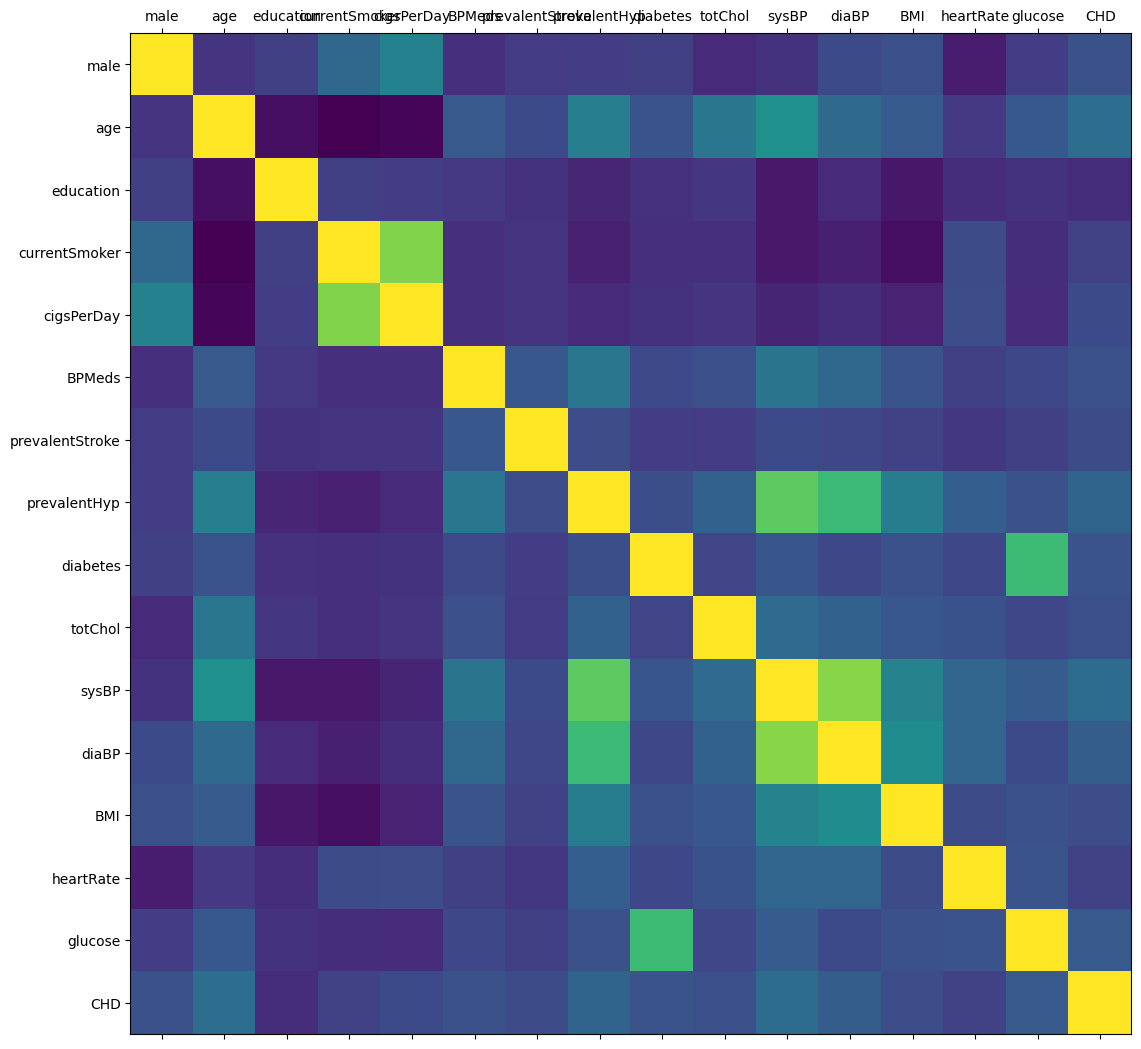

In [ ]:
#Data dalam bentuk visual
korelasi_plot(data)

### Logistic Regression

    Regresi logistik adalah jenis analisis regresi dalam statistik yang digunakan untuk memprediksi hasil variabel dependen kategoris dari sekumpulan prediktor atau variabel independen. Dalam regresi logistik, variabel dependen selalu biner. Regresi logistik terutama digunakan untuk prediksi dan juga menghitung probabilitas keberhasilan.

In [ ]:
from statsmodels.tools import add_constant as add_constant
data_constant = add_constant(data)
data_constant.head()

,const,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [ ]:
X_train = train_data.loc[:,train_data.columns != 'CHD']
y_train = train_data.loc[:,'CHD']
X_test = test_data.loc[:, test_data.columns !='CHD']
y_test = test_data.loc[:, 'CHD']

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report